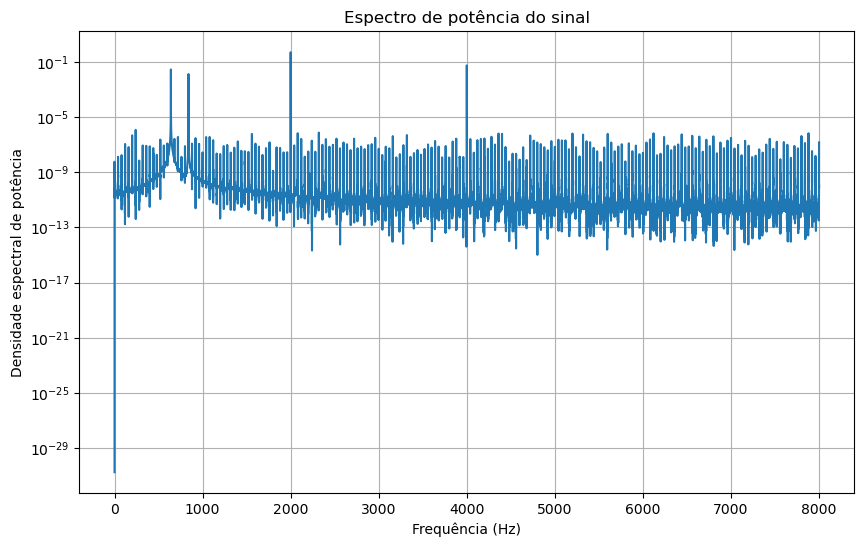

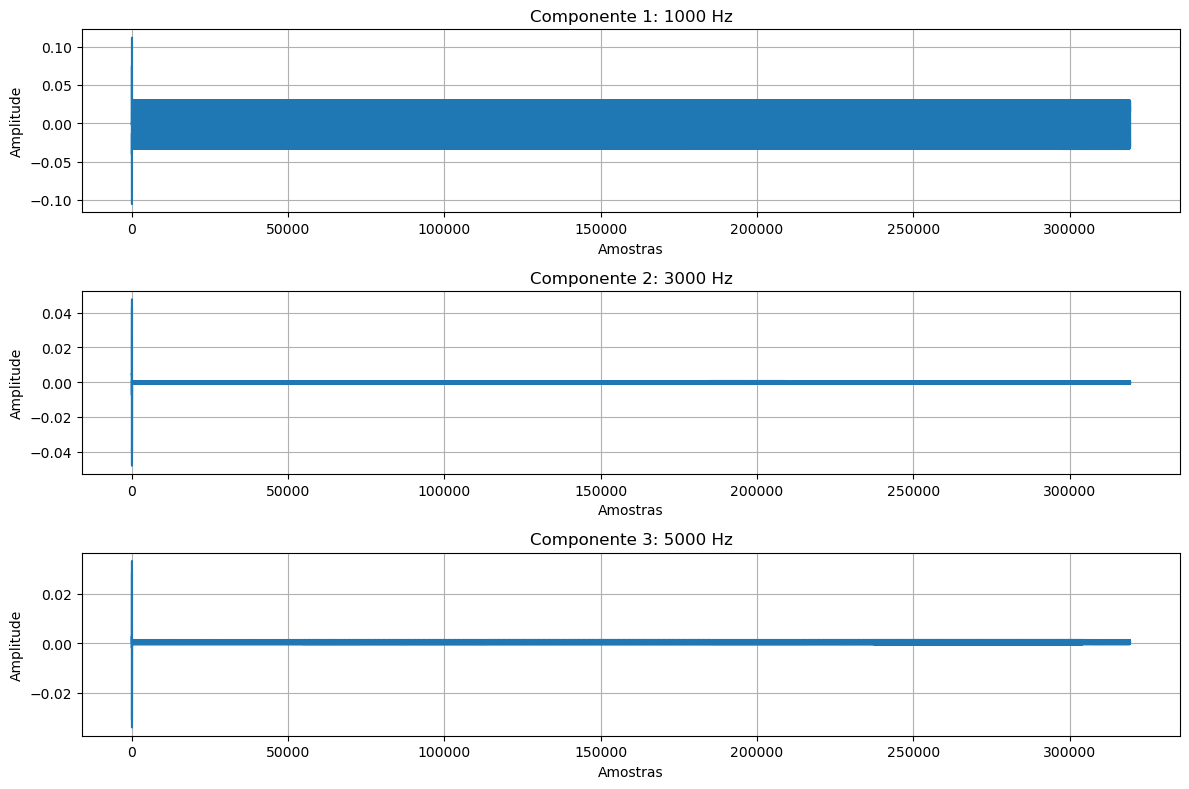

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import firwin, lfilter, freqz, periodogram

sampling_rate, signal = wavfile.read('sinal_1.wav')
signal = signal / np.max(np.abs(signal)) 

frequencies, power_spectrum = periodogram(signal, fs=sampling_rate)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_spectrum)
plt.title("Espectro de potência do sinal")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Densidade espectral de potência")
plt.grid()
plt.show()

nyquist_rate = sampling_rate / 2

def apply_fir_bandpass(signal, lowcut, highcut, fs, numtaps=101):
    taps = firwin(numtaps, [lowcut / nyquist_rate, highcut / nyquist_rate], pass_zero=False)
    filtered_signal = lfilter(taps, 1.0, signal)
    return filtered_signal, taps

plt.figure(figsize=(12, 8))
for i, freq in enumerate(component_frequencies):
    lowcut = freq - 200 
    highcut = freq + 200
    filtered_signal, taps = apply_fir_bandpass(signal, lowcut, highcut, sampling_rate)

    plt.subplot(len(component_frequencies), 1, i+1)
    plt.plot(filtered_signal)
    plt.title(f'Componente {i+1}: {freq} Hz')
    plt.xlabel('Amostras')
    plt.ylabel('Amplitude')
    plt.grid()

plt.tight_layout()
plt.show()
